In [1]:
import os
import tempfile
import scanpy as sc

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warn

In [2]:
import seaborn as sns
import torch

In [3]:
import scvi

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset

In [4]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

[rank: 0] Seed set to 0


Last run with scvi-tools version: 1.2.0


In [6]:
sc.set_figure_params(figsize=(6, 6), frameon=False)
sns.set_theme()
torch.set_float32_matmul_precision("high")
save_dir = "/groups/tanaka/People/current/jiwang/projects/heart_regeneration/results/cross_species_20240220/scvi_out/"

%config InlineBackend.print_figure_kwargs={"facecolor": "w"}
%config InlineBackend.figure_format="retina"

In [36]:
## start to import or download the data
#adata = scvi.data.heart_cell_atlas_subsampled(save_path=save_dir)
adata = sc.read_h5ad(os.path.join(save_dir, 'nm_mm_ax_scRNAseq_merged_v1.h5ad'))

In [37]:
adata

AnnData object with n_obs × n_vars = 104365 × 8917
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nGene', 'nUMI', 'stage', 'time', 'condition', 'tech', 'percent.mito', 'var.ratio.pca', 'nCount_integrated', 'nFeature_integrated', 'integrated_snn_res.0.8', 'integrated_snn_res.0.5', 'FineID', 'BroadID', 'treatment', 'dataset', 'celltypes', 'percent.mt', 'percent.cardio', 'RNA_snn_res.0.6', 'seurat_clusters', 'percent.rediff', 'percent.cell_cycle', 'RNA_snn_res.0.5', 'RNA_snn_res.0.2', 'age', 'injury', 'RNA_snn_res.0.7', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'batch', 'species', 'subtype', 'celltype', 'RNA_snn_res.1', 'annot_clusters', 'my_annot', 'timepoints', 'CellID', 'sample', 'group', 'plate_id', 'CellType', 'SubCluster', 'iscell_dd', 'iscell_ed', 'pANN_0.25_0.02_773', 'DF.classifications_0.25_0.02_773', 'pANN_0.25_0.01_606', 'DF.classifications_0.25_0.01_606', 'pANN_0.25_0.005_511', 'DF.classifications_0.25_0.005_511', 'pANN_0.25_0.005_610', 'DF.classifications_0.25_0.005_610',

In [38]:
adata.obs[['batch']]
adata.obs[['dataset']]
#adata.layers.keys()

,dataset
m_nm_Wang2020_P1_1MI_AAACCTGAGAATTGTG,nm_Wang2020
m_nm_Wang2020_P1_1MI_AAGGAGCAGGATCGCA,nm_Wang2020
m_nm_Wang2020_P1_1MI_AAGGAGCGTCTTGATG,nm_Wang2020
m_nm_Wang2020_P1_1MI_ACGGAGAGTAGAGCTG,nm_Wang2020
m_nm_Wang2020_P1_1MI_ACTGAACGTGGCAAAC,nm_Wang2020
...,...
ax_TTTGTTGGTAGCTAGC-1,ax_Bassat2024
ax_TTTGTTGGTCTAACCT-1,ax_Bassat2024
ax_TTTGTTGGTCTAGCTT-1,ax_Bassat2024
ax_TTTGTTGGTGTGCAAC-1,ax_Bassat2024


In [39]:
sc.pp.filter_genes(adata, min_counts=3)

In [40]:
adata.layers["counts"] = adata.X.copy()  # preserve counts
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata  # freeze the state in `.raw`

In [41]:
adata

AnnData object with n_obs × n_vars = 104365 × 8917
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nGene', 'nUMI', 'stage', 'time', 'condition', 'tech', 'percent.mito', 'var.ratio.pca', 'nCount_integrated', 'nFeature_integrated', 'integrated_snn_res.0.8', 'integrated_snn_res.0.5', 'FineID', 'BroadID', 'treatment', 'dataset', 'celltypes', 'percent.mt', 'percent.cardio', 'RNA_snn_res.0.6', 'seurat_clusters', 'percent.rediff', 'percent.cell_cycle', 'RNA_snn_res.0.5', 'RNA_snn_res.0.2', 'age', 'injury', 'RNA_snn_res.0.7', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'batch', 'species', 'subtype', 'celltype', 'RNA_snn_res.1', 'annot_clusters', 'my_annot', 'timepoints', 'CellID', 'sample', 'group', 'plate_id', 'CellType', 'SubCluster', 'iscell_dd', 'iscell_ed', 'pANN_0.25_0.02_773', 'DF.classifications_0.25_0.02_773', 'pANN_0.25_0.01_606', 'DF.classifications_0.25_0.01_606', 'pANN_0.25_0.005_511', 'DF.classifications_0.25_0.005_511', 'pANN_0.25_0.005_610', 'DF.classifications_0.25_0.005_610',

In [42]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=3000,
    subset=True,
    layer="counts",
    flavor="seurat_v3",
    batch_key="dataset",
)

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [59]:
scvi.model.SCVI.setup_anndata(
    adata,
    layer="counts",
    categorical_covariate_keys=["species", 'dataset']
    #continuous_covariate_keys=["percent_mito", "percent_ribo"],
)

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [60]:
#model = scvi.model.SCVI(adata)
model = scvi.model.SCVI(adata, n_layers=2, n_latent=40, gene_likelihood="nb")

In [61]:
model

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 30, n_layers: 2, dropout_rate: 0.1, dispersion: gene, gene_likelihood: nb, 
latent_distribution: normal.
Training status: Not Trained
Model's adata is minified?: False

In [62]:
model.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
SLURM auto-requeueing enabled. Setting signal handlers.
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 77/77: 100%|██████████| 77/77 [34:47<00:00, 28.29s/it, v_num=1, train_loss_step=1.05e+3, train_loss_epoch=1.04e+3]

`Trainer.fit` stopped: `max_epochs=77` reached.


Epoch 77/77: 100%|██████████| 77/77 [34:47<00:00, 27.12s/it, v_num=1, train_loss_step=1.05e+3, train_loss_epoch=1.04e+3]


In [63]:
model_dir = os.path.join(save_dir, "scvi_model_ax_nm_mm")
model.save(model_dir, overwrite=True)

In [64]:
model = scvi.model.SCVI.load(model_dir, adata=adata)

INFO     File                                                                                                      
         /groups/tanaka/People/current/jiwang/projects/heart_regeneration/results/cross_species_20240220/scvi_out/s
         cvi_model_ax_nm_mm/model.pt already downloaded                                                            


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

In [65]:
SCVI_LATENT_KEY = "X_scVI"

latent = model.get_latent_representation()
adata.obsm[SCVI_LATENT_KEY] = latent
latent.shape

(104365, 30)

In [66]:
adata.obs[['celltype']]

,celltype
m_nm_Wang2020_P1_1MI_AAACCTGAGAATTGTG,Immune
m_nm_Wang2020_P1_1MI_AAGGAGCAGGATCGCA,Immune
m_nm_Wang2020_P1_1MI_AAGGAGCGTCTTGATG,EPI
m_nm_Wang2020_P1_1MI_ACGGAGAGTAGAGCTG,Immune
m_nm_Wang2020_P1_1MI_ACTGAACGTGGCAAAC,Immune
...,...
ax_TTTGTTGGTAGCTAGC-1,EC
ax_TTTGTTGGTCTAACCT-1,EC
ax_TTTGTTGGTCTAGCTT-1,CM
ax_TTTGTTGGTGTGCAAC-1,EC


In [67]:
#adata_subset = adata[adata.obs.celltype == "CM"]
#latent_subset = model.get_latent_representation(adata_subset)
#latent.shape

INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


(104365, 30)

In [68]:
#denoised = model.get_normalized_expression(adata_subset, library_size=1e4)
#denoised.iloc[:5, :5]

,Slc15a4,Aacs,Stx2,Cldn5,Gp1bb
m_nm_Wang2020_P1_1MI_CATCAAGGTCCTAGCG,1.038911,0.612301,1.453860,2.398964,0.225668
m_nm_Wang2020_P1_1MI_CATCCACGTACCCAAT,1.215130,0.923791,1.299237,4.487703,0.352160
m_nm_Wang2020_P1_1MI_CGTCAGGAGGCGCTCT,1.043998,0.735703,1.532471,6.419612,0.300034
m_nm_Wang2020_P1_1MI_TACAGTGGTCGCCATG,0.648920,0.586376,1.185432,4.411277,0.184955
m_nm_Wang2020_P1_1MI_TGAGCATGTACAGTTC,1.231986,1.068076,1.910054,5.151454,0.381906


In [69]:
SCVI_NORMALIZED_KEY = "scvi_normalized"
adata.layers[SCVI_NORMALIZED_KEY] = model.get_normalized_expression(library_size=10e4)

In [70]:
# Interoperability and visualization with Scanpy

In [71]:
# use scVI latent space for UMAP generation
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY)
sc.tl.umap(adata, min_dist=0.3)

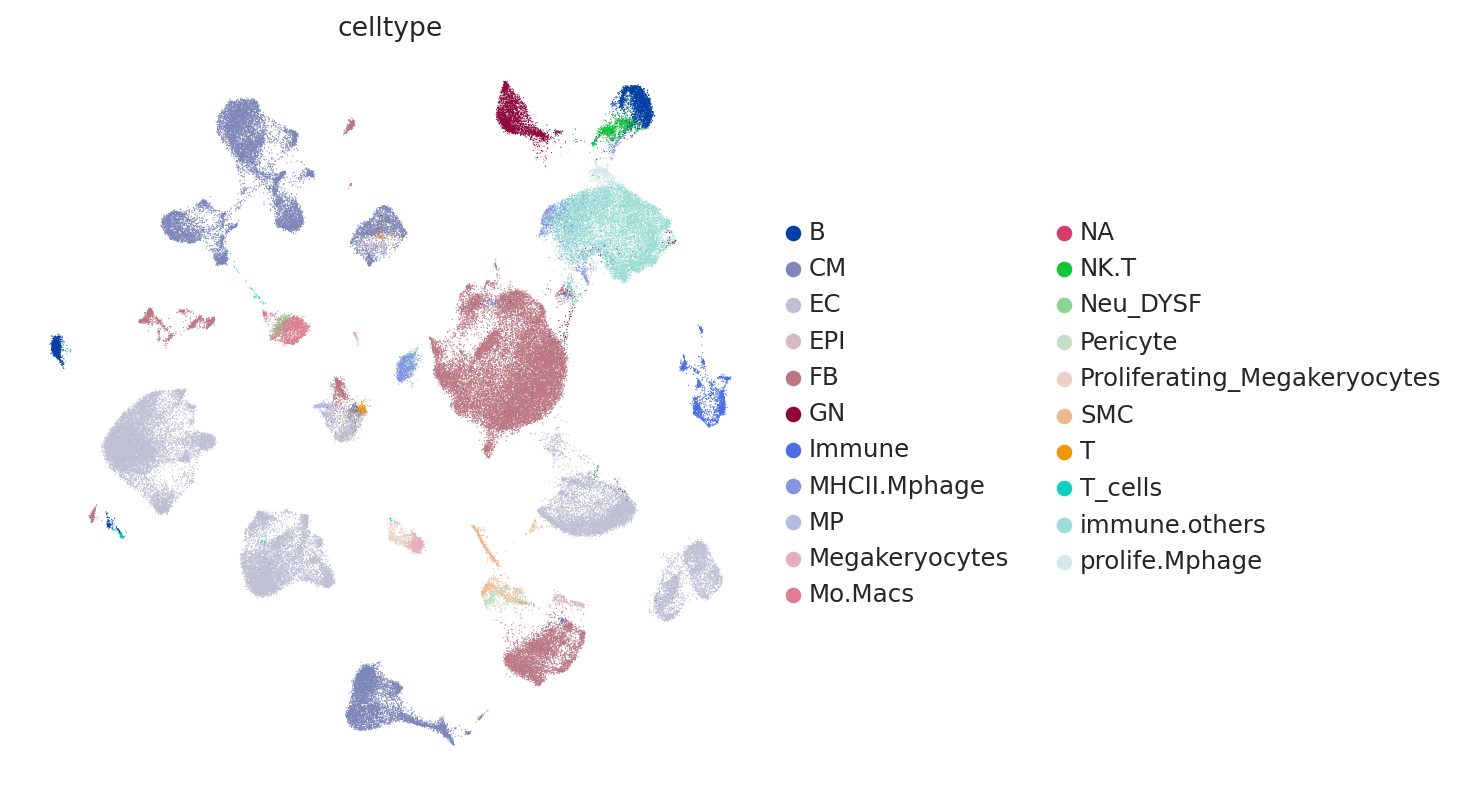

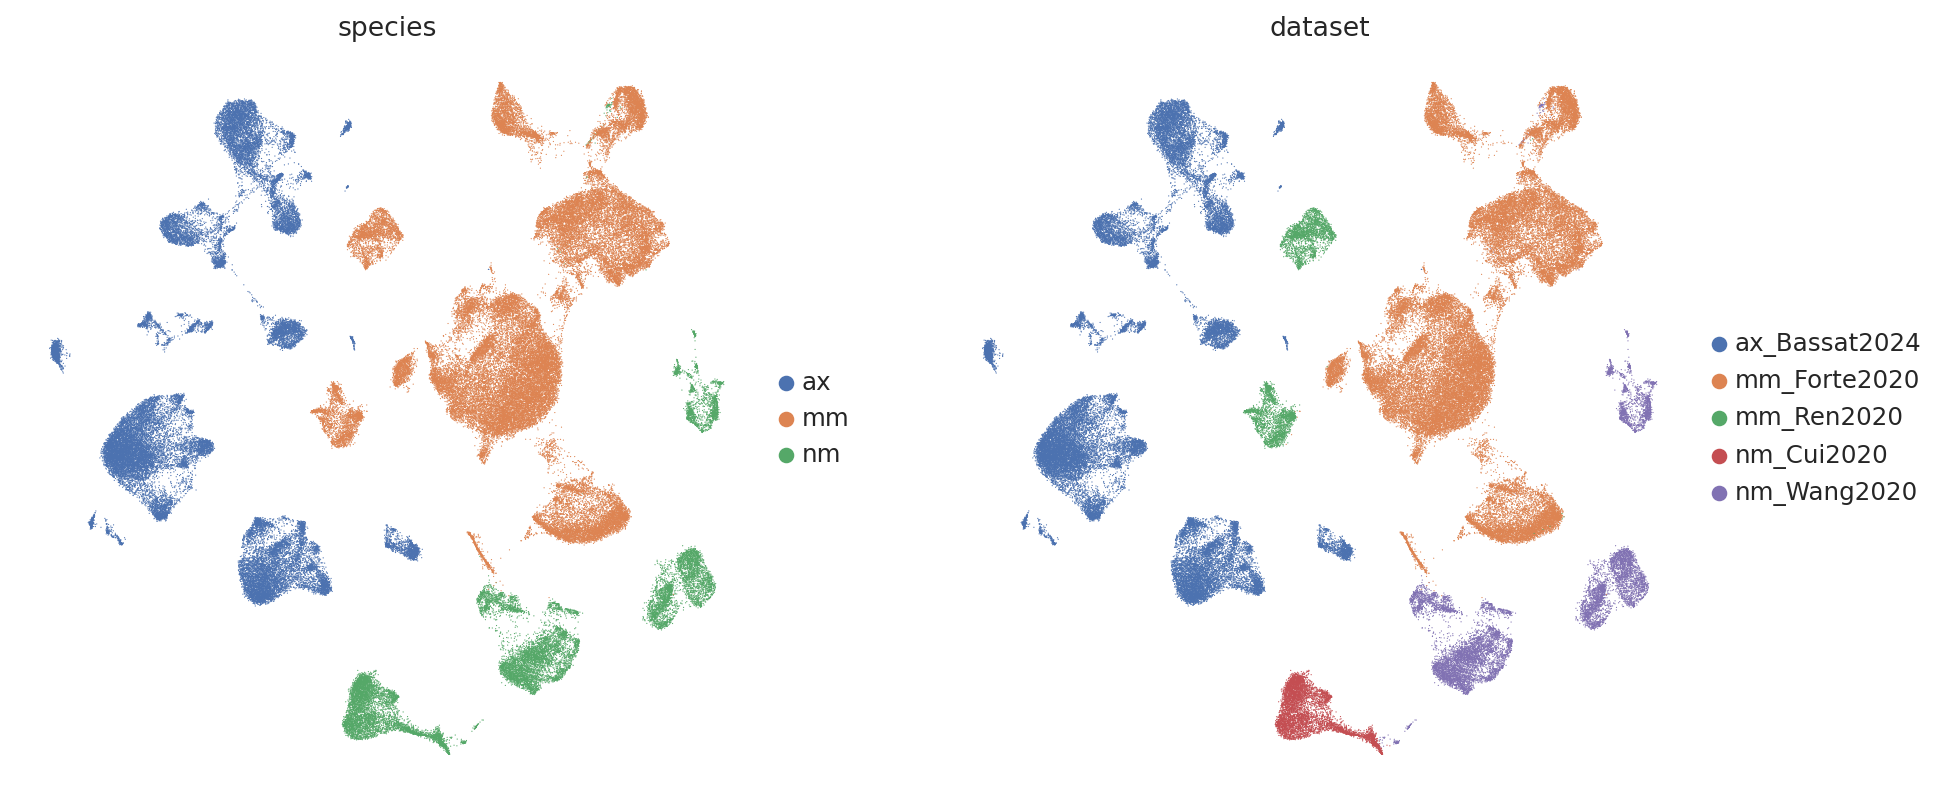

In [72]:
sc.pl.umap(
    adata,
    color=["celltype"],
    frameon=False,
)
sc.pl.umap(
    adata,
    color=["species", "dataset"],
    ncols=2,
    frameon=False,
)

In [73]:
# run PCA then generate UMAP plots
#sc.tl.pca(adata)
#sc.pp.neighbors(adata, n_pcs=30, n_neighbors=20)
#sc.tl.umap(adata, min_dist=0.3)

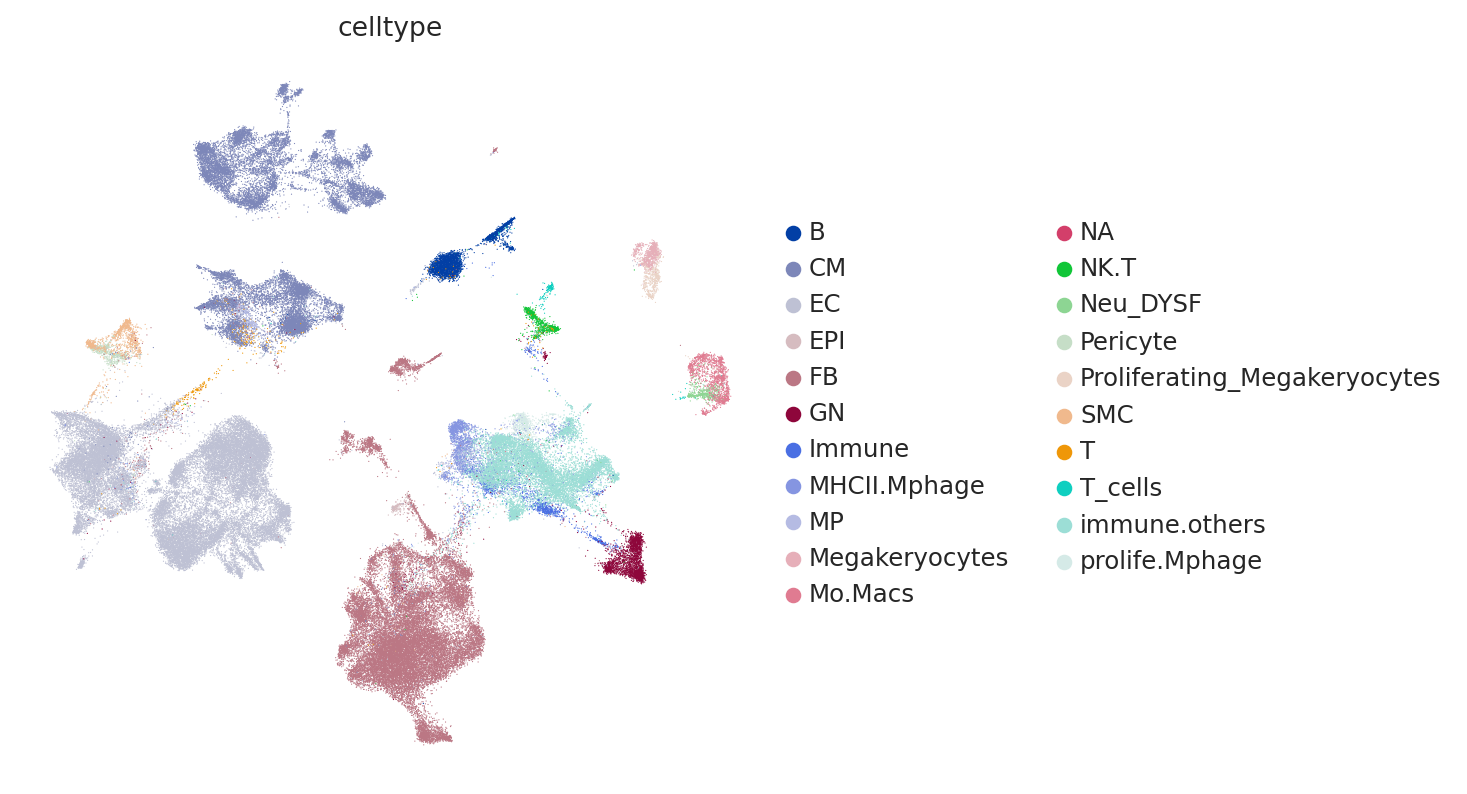

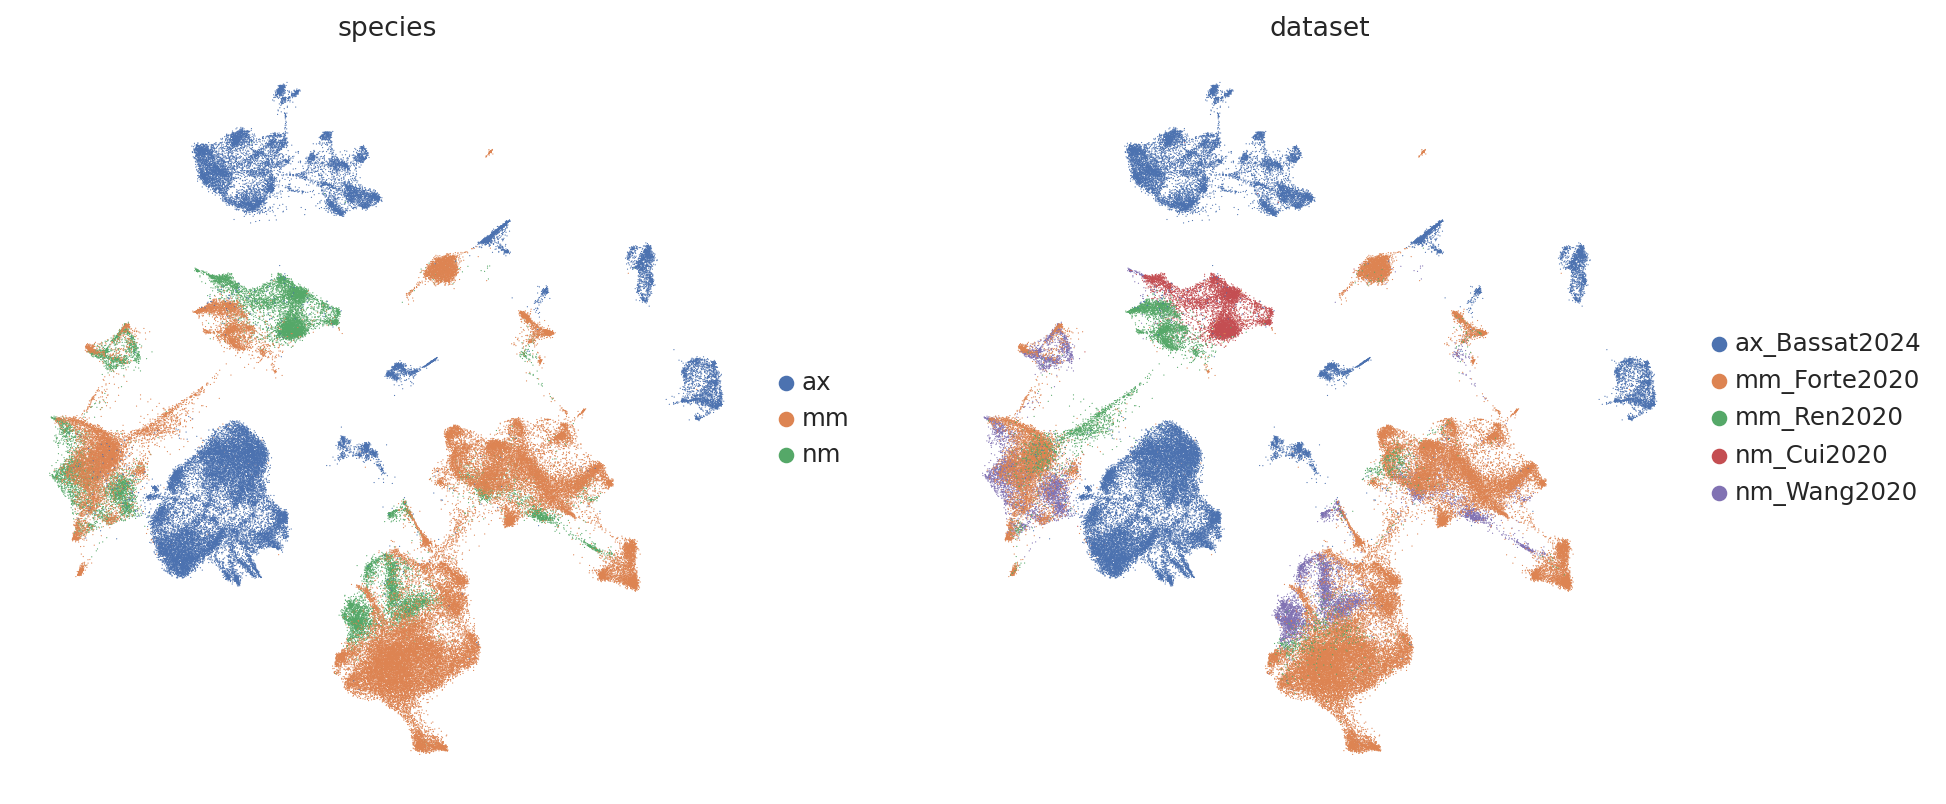

In [74]:
sc.pl.umap(
    adata,
    color=["celltype"],
    frameon=False,
)
sc.pl.umap(
    adata,
    color=["species", "dataset"],
    ncols=2,
    frameon=False,
)

In [26]:
adata.obs.cell_type.head()

AACTCCCCACGAGAGT-1-HCAHeart7844001                      Myeloid
ATAACGCAGAGCTGGT-1-HCAHeart7829979    Ventricular_Cardiomyocyte
GTCAAGTCATGCCACG-1-HCAHeart7702879                   Fibroblast
GGTGATTCAAATGAGT-1-HCAHeart8102858                  Endothelial
AGAGAATTCTTAGCAG-1-HCAHeart8102863                  Endothelial
Name: cell_type, dtype: category
Categories (11, object): ['Adipocytes', 'Atrial_Cardiomyocyte', 'Endothelial', 'Fibroblast', ..., 'Neuronal', 'Pericytes', 'Smooth_muscle_cells', 'Ventricular_Cardiomyocyte']

In [27]:
de_df = model.differential_expression(
    groupby="cell_type", group1="Endothelial", group2="Fibroblast"
)
de_df.head()

DE...: 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
EGFL7,0.9996,0.0004,7.823621,0.007806,0.000289,0.0,0.25,5.237341,5.193677,1.714319,...,2.376779,0.036795,0.741543,0.025756,89.509911,1.171088,True,Endothelial vs Fibroblast,Endothelial,Fibroblast
VWF,0.9992,0.0008,7.130086,0.013348,0.000486,0.0,0.25,5.207946,5.218299,1.830106,...,5.072563,0.054375,0.808226,0.032298,169.698700,2.210058,True,Endothelial vs Fibroblast,Endothelial,Fibroblast
COL6A3,0.9990,0.0010,6.906745,0.000177,0.005164,0.0,0.25,-5.602639,-5.693408,1.781582,...,0.026284,1.228131,0.021903,0.498365,1.196546,54.222549,True,Endothelial vs Fibroblast,Endothelial,Fibroblast
SCARA5,0.9984,0.0016,6.436144,0.000027,0.001473,0.0,0.25,-7.631696,-7.958348,2.953020,...,0.003407,0.332787,0.003164,0.206868,0.162206,14.331070,True,Endothelial vs Fibroblast,Endothelial,Fibroblast
COL1A2,0.9982,0.0018,6.318161,0.000229,0.004114,0.0,0.25,-4.871646,-4.992768,1.674600,...,0.021660,1.120196,0.016306,0.472200,0.914204,44.767612,True,Endothelial vs Fibroblast,Endothelial,Fibroblast


In [28]:
de_df = model.differential_expression(
    groupby="cell_type",
)
de_df.head()

DE...: 100%|██████████| 11/11 [00:21<00:00,  1.96s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
GPAM,0.9994,0.0006,7.417964,0.021384,0.000184,0.0,0.25,7.346238,7.271008,2.407014,...,17.372416,0.035791,0.896552,0.031520,280.350311,1.566058,True,Adipocytes vs Rest,Adipocytes,Rest
PLIN1,0.9990,0.0010,6.906745,0.004813,0.000041,0.0,0.25,7.917045,7.759730,2.828001,...,2.799999,0.004379,0.806897,0.004325,52.928539,0.196444,True,Adipocytes vs Rest,Adipocytes,Rest
FASN,0.9990,0.0010,6.906745,0.015508,0.000169,0.0,0.25,6.617262,6.643374,2.137205,...,7.062068,0.025086,0.841379,0.022167,129.082001,1.084522,True,Adipocytes vs Rest,Adipocytes,Rest
DGAT2,0.9980,0.0020,6.212601,0.006353,0.000040,0.0,0.25,7.638672,7.762452,2.565704,...,2.682757,0.005028,0.593103,0.004866,43.614101,0.194121,True,Adipocytes vs Rest,Adipocytes,Rest
CIDEC,0.9978,0.0022,6.117091,0.002249,0.000030,0.0,0.25,7.510875,7.569562,2.868721,...,1.137931,0.001406,0.510345,0.001406,21.810789,0.057569,True,Adipocytes vs Rest,Adipocytes,Rest


In [29]:
markers = {}
cats = adata.obs.cell_type.cat.categories
for c in cats:
    cid = f"{c} vs Rest"
    cell_type_df = de_df.loc[de_df.comparison == cid]

    cell_type_df = cell_type_df[cell_type_df.lfc_mean > 0]

    cell_type_df = cell_type_df[cell_type_df["bayes_factor"] > 3]
    cell_type_df = cell_type_df[cell_type_df["non_zeros_proportion1"] > 0.1]

    markers[c] = cell_type_df.index.tolist()[:3]

In [30]:
sc.tl.dendrogram(adata, groupby="cell_type", use_rep="X_scVI")

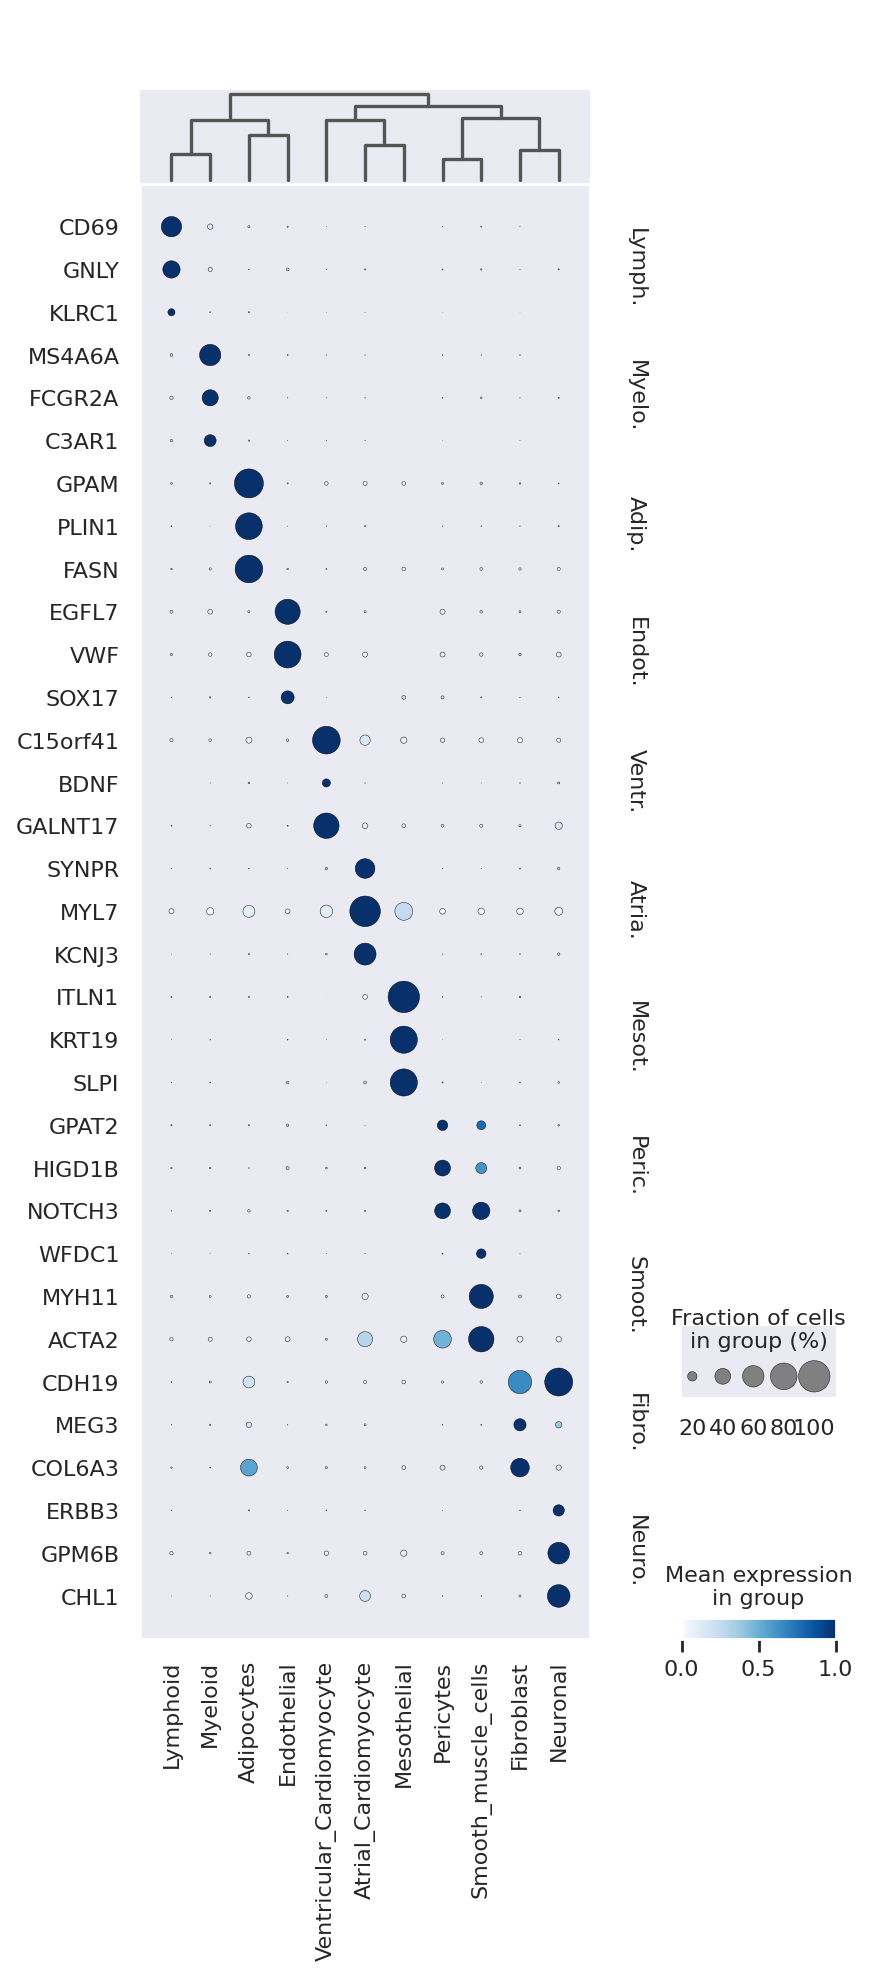

In [31]:
sc.pl.dotplot(
    adata,
    markers,
    groupby="cell_type",
    dendrogram=True,
    color_map="Blues",
    swap_axes=True,
    use_raw=True,
    standard_scale="var",
)

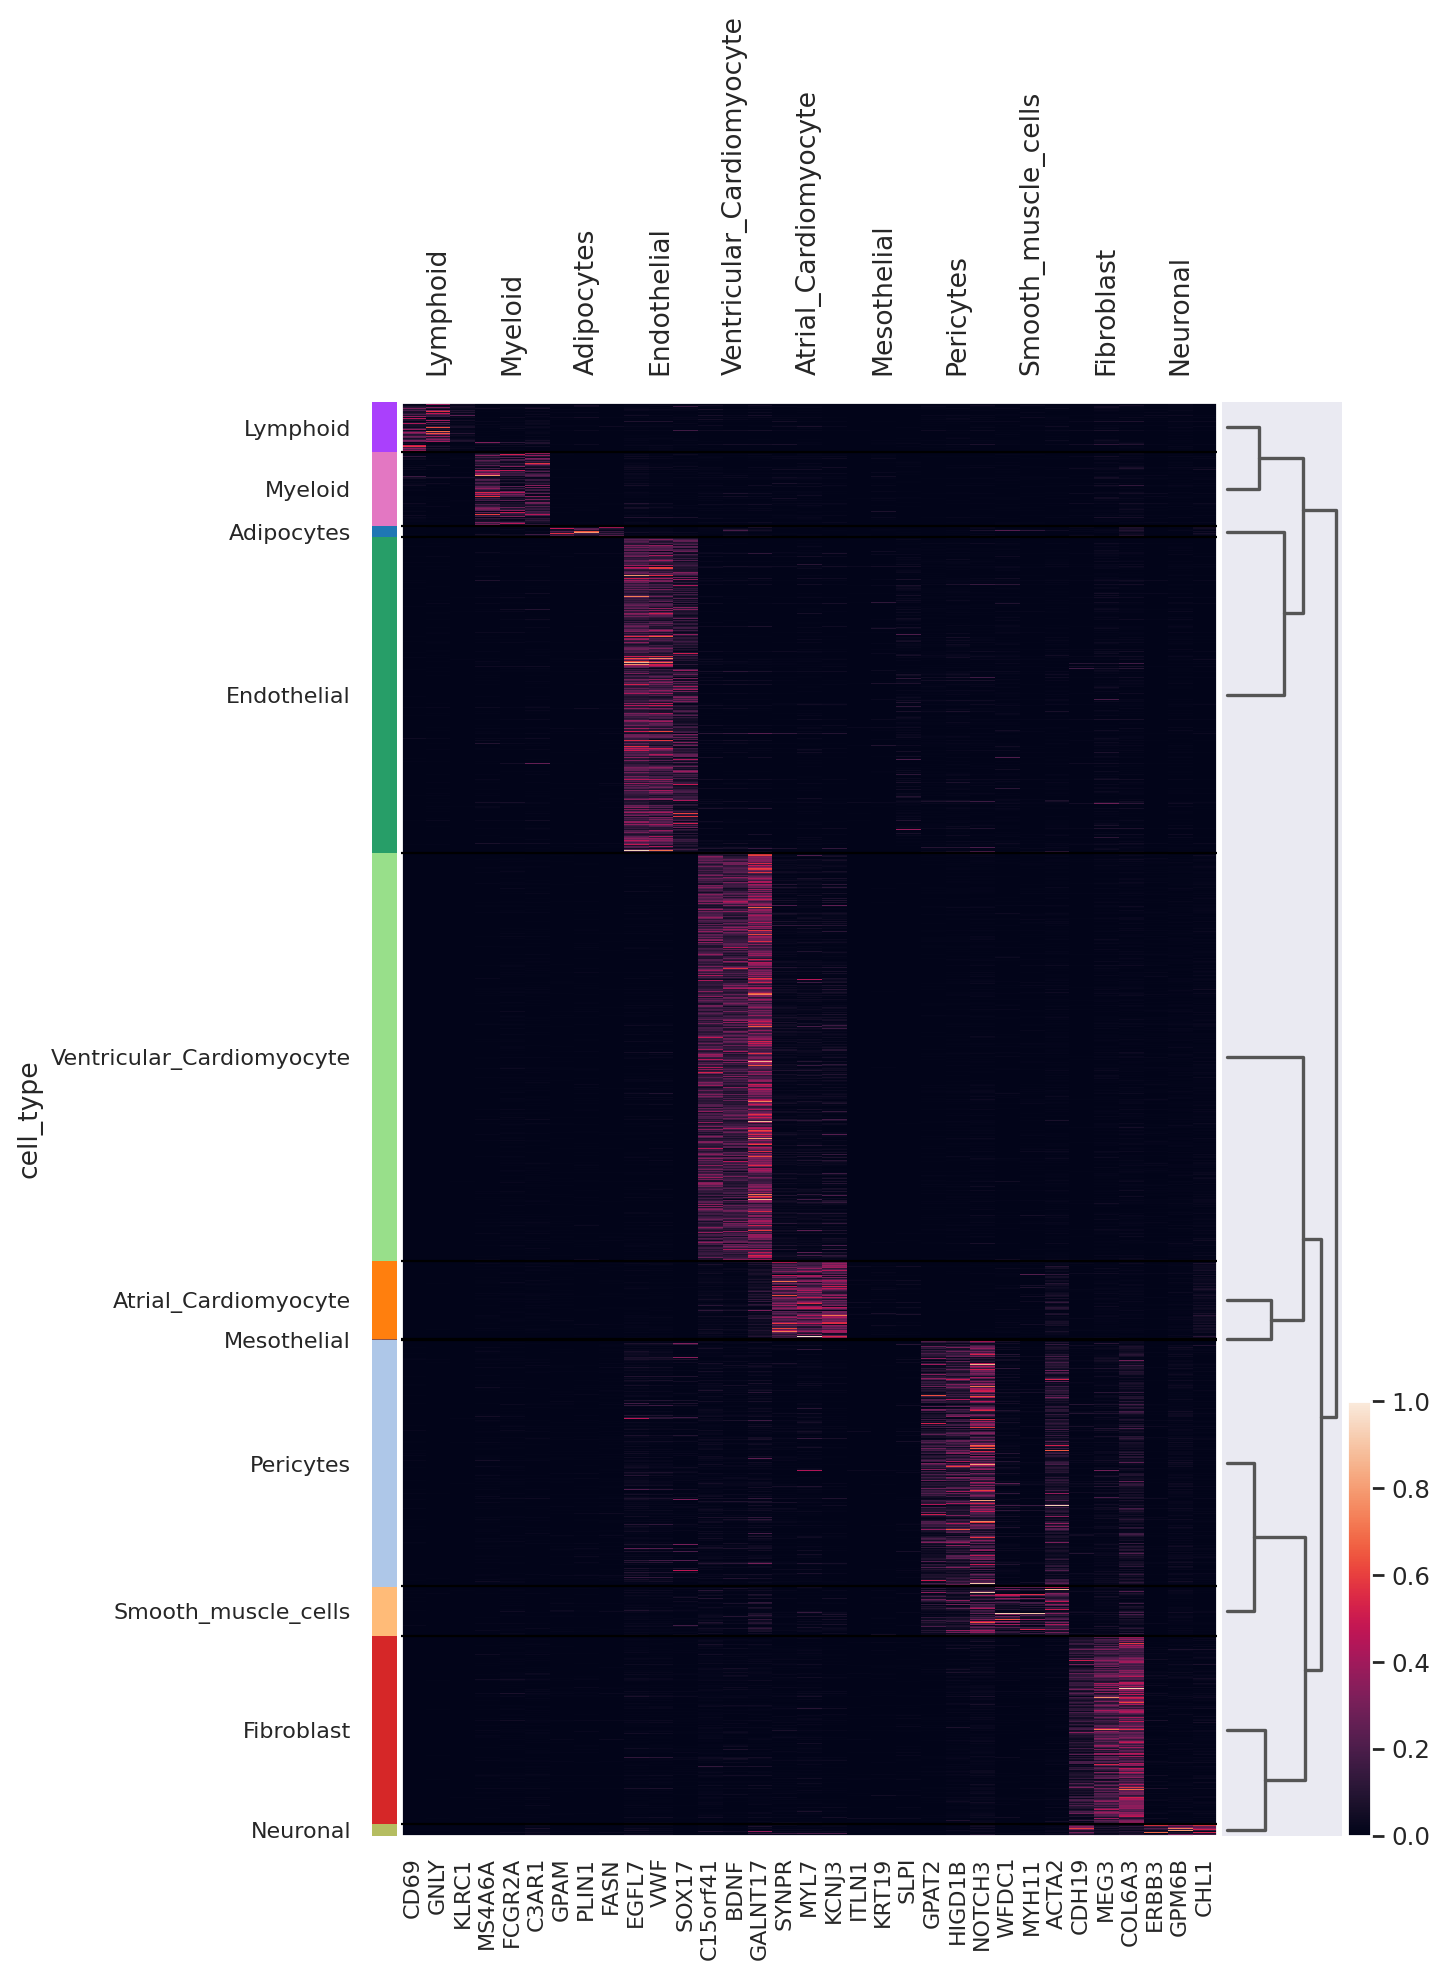

In [32]:
sc.pl.heatmap(
    adata,
    markers,
    groupby="cell_type",
    layer="scvi_normalized",
    standard_scale="var",
    dendrogram=True,
    figsize=(8, 12),
)

In [ ]:
## test scANVI 
## original code from https://docs.scvi-tools.org/en/stable/tutorials/notebooks/scrna/harmonization.html

In [34]:
import os
import tempfile

import scanpy as sc
import scvi
import seaborn as sns
import torch
from rich import print
from scib_metrics.benchmark import Benchmarker

In [35]:
sc.set_figure_params(figsize=(6, 6), frameon=False)
sns.set_theme()
torch.set_float32_matmul_precision("high")
#save_dir = tempfile.TemporaryDirectory()

%config InlineBackend.print_figure_kwargs={"facecolor": "w"}
%config InlineBackend.figure_format="retina"

In [37]:
adata_path = os.path.join(save_dir, "lung_atlas.h5ad")

adata = sc.read(
    adata_path,
    backup_url="https://figshare.com/ndownloader/files/24539942",
)
adata

100%|██████████| 972M/972M [01:28<00:00, 11.5MB/s]  


AnnData object with n_obs × n_vars = 32472 × 15148
    obs: 'dataset', 'location', 'nGene', 'nUMI', 'patientGroup', 'percent.mito', 'protocol', 'sanger_type', 'size_factors', 'sampling_method', 'batch', 'cell_type', 'donor'
    layers: 'counts'

In [38]:
adata.raw = adata  # keep full dimension safe
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=2000,
    layer="counts",
    batch_key="batch",
    subset=True,
)

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [39]:
scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key="batch")

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [40]:
model = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood="nb")

In [41]:
model.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 246/246: 100%|██████████| 246/246 [47:57<00:00, 10.91s/it, v_num=1, train_loss_step=619, train_loss_epoch=552]

`Trainer.fit` stopped: `max_epochs=246` reached.


Epoch 246/246: 100%|██████████| 246/246 [47:57<00:00, 11.70s/it, v_num=1, train_loss_step=619, train_loss_epoch=552]


In [42]:
SCVI_LATENT_KEY = "X_scVI"
adata.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

In [44]:
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY)
sc.tl.leiden(adata)

/tmp/ipykernel_14224/2529970008.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


In [45]:
SCVI_MDE_KEY = "X_scVI_MDE"
adata.obsm[SCVI_MDE_KEY] = scvi.model.utils.mde(adata.obsm[SCVI_LATENT_KEY], accelerator="cpu")

ImportError: Please install pymde package via `pip install pymde`

In [ ]:
sc.pl.embedding(
    adata,
    basis=SCVI_MDE_KEY,
    color=["batch", "leiden"],
    frameon=False,
    ncols=1,
)

In [ ]:
sc.pl.embedding(adata, basis=SCVI_MDE_KEY, color=["cell_type"], frameon=False, ncols=1)

In [ ]:
scanvi_model = scvi.model.SCANVI.from_scvi_model(
    model,
    adata=adata,
    labels_key="cell_type",
    unlabeled_category="Unknown",
)

In [ ]:
scanvi_model.train(max_epochs=20, n_samples_per_label=100)

In [ ]:
SCANVI_LATENT_KEY = "X_scANVI"
adata.obsm[SCANVI_LATENT_KEY] = scanvi_model.get_latent_representation(adata)

In [ ]:
SCANVI_MDE_KEY = "X_scANVI_MDE"
adata.obsm[SCANVI_MDE_KEY] = scvi.model.utils.mde(adata.obsm[SCANVI_LATENT_KEY], accelerator="cpu")

In [ ]:
sc.pl.embedding(adata, basis=SCANVI_MDE_KEY, color=["cell_type"], ncols=1, frameon=False)

In [ ]:
sc.pl.embedding(adata, basis=SCANVI_MDE_KEY, color=["cell_type"], ncols=1, frameon=False)

In [ ]:
bm = Benchmarker(
    adata,
    batch_key="batch",
    label_key="cell_type",
    embedding_obsm_keys=["X_pca", SCVI_LATENT_KEY, SCANVI_LATENT_KEY],
    n_jobs=-1,
)
bm.benchmark()

In [ ]:
bm.plot_results_table(min_max_scale=False)

In [ ]:
df = bm.get_results(min_max_scale=False)
print(df)